# Regresión Lineal: Coste de un incidente de seguridad

Predeciremos el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de forma aleatoria.

## 1. Generación del conjunto de datos

In [17]:
import numpy as np

X = 2* np.random.rand(100, 1)  # Genero una variable de entrada que será el número de equipos afectados
# Genera una array bidimensional de 100 filas de un elemento
# La longitud es de 100
y = 4 + 2*X+np.random.rand(100, 1)
print("La longitud del conjunto de datos es: ", len(X))

La longitud del conjunto de datos es:  100


array([[1.7079665 ],
       [0.74298288],
       [1.09983037],
       [0.03743667],
       [1.81949008],
       [1.25261517],
       [1.80478491],
       [1.38355253],
       [1.77795625],
       [1.71485289],
       [1.28927775],
       [1.24531153],
       [1.67943782],
       [1.37394433],
       [0.5639437 ],
       [0.89809496],
       [0.73164125],
       [1.94160928],
       [0.11372262],
       [1.69653127],
       [1.50651437],
       [0.82961572],
       [1.29282545],
       [1.18044026],
       [0.75242656],
       [0.49649034],
       [1.63728027],
       [0.97432742],
       [1.60293494],
       [0.55073075],
       [1.51556317],
       [1.7050081 ],
       [1.04103175],
       [0.93170289],
       [0.58223146],
       [1.85506112],
       [1.19686729],
       [0.98212628],
       [1.49480517],
       [0.33173227],
       [1.66277927],
       [0.71786001],
       [0.70429252],
       [1.07493307],
       [1.78330191],
       [1.929897  ],
       [1.99688247],
       [1.795

## 2. Visualización del conjunto de datos

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

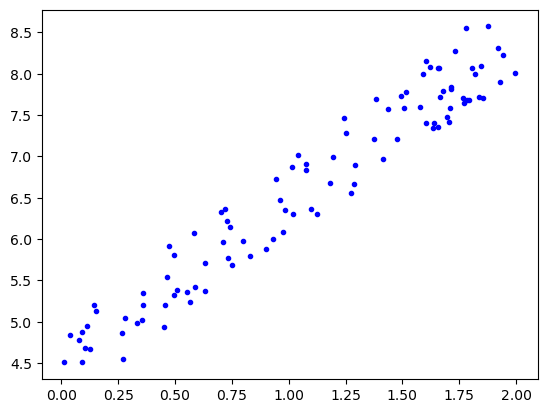

In [21]:
plt.plot(X, y, "b.")
plt.show()

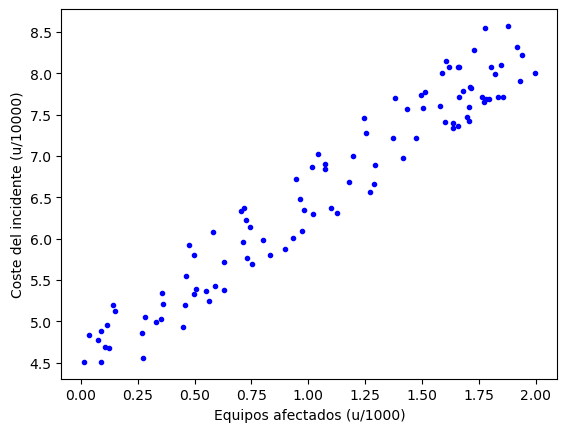

In [23]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

## 3. Modificación del conjunto de datos

In [27]:
import pandas as pd

In [29]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()} #flatten convierte un array multidimensional en unidimensional, lo aplana
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,1.707967,7.588456
1,0.742983,6.143686
2,1.099830,6.368342
3,0.037437,4.840082
4,1.819490,7.991223
5,1.252615,7.279376
6,1.804785,8.072692
7,1.383553,7.699493
8,1.777956,8.549630
9,1.714853,7.817793


In [31]:
# Escalado del número de equipos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')
# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,1707,75884
1,742,61436
2,1099,63683
3,37,48400
4,1819,79912
5,1252,72793
6,1804,80726
7,1383,76994
8,1777,85496
9,1714,78177


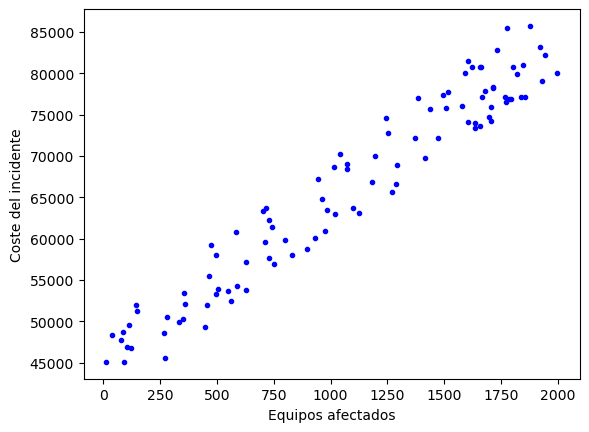

In [33]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

## 4. Construcción del modelo

In [35]:
from sklearn.linear_model import LinearRegression

In [39]:
# Construcción del modelo y ajustar la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'].values)
# Con reshape(-1, 1) modificamos el valor de entrada del array diciéndole que la primera dimensión la determine él según los valores que tenga
# pero la segunda dimensión sea de un elemento en cada fila. Es decir convierte el array en bidimensional con una columna.
# Con fit entrenamos el modelo

LinearRegression()

In [41]:
# Parámetro theta 0, el valor con el que corta el eje Y
lin_reg.intercept_

45488.85857031483

In [43]:
# Parámetro theta 1, la pendiente de la función
lin_reg.coef_

array([19.07376543])

In [45]:
# Predicción para el valor míniimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

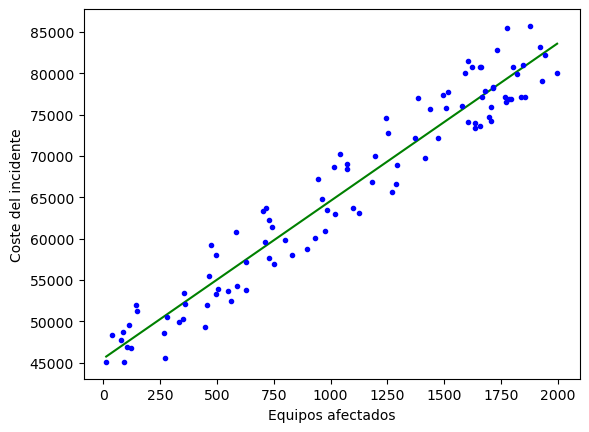

In [47]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

## Predicción de nuevos ejemplos

In [49]:
x_new = np.array([[1300]]) # 1300 equipos afectados
# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new)
print("El coste del incidente sería: ", int(coste[0]), "€")

El coste del incidente sería:  70284 €


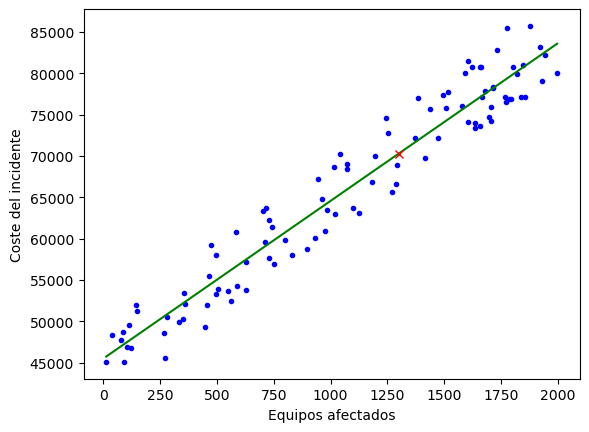

In [51]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()